# Notebook to compute the momentum broadening results

### We compute $<p_i^2>$ broadening

We read the files

In [2]:
# We create a list with the files to read

N = 100

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v2.1/output/pi_results_with_t0/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_nPx0_nPy0_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/pperp/evolution_Pperp_sq.dat' %n for n in range(N)]

In [6]:
# We read each file into a dataframe of a list

import pandas as pd 

df_list = []
for i in range(N):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

We compute the $y$ and $z$ broadening

In [7]:
# We compute the average p_perp and the deviation at every time step

import numpy as np 

data = np.array(df_list)

xplus = data[0, :, 0]
py2 = data[:, :, 2]
pz2 = data[:, :, 1]

py_av = [np.average(py2[:, j]) for j in range(len(xplus))]
pz_av = [np.average(pz2[:, j]) for j in range(len(xplus))]

py_dev = [np.std(py2[:, j])/np.sqrt(N) for j in range(len(xplus))]
pz_dev = [np.std(pz2[:, j])/np.sqrt(N) for j in range(len(xplus))]

print(xplus)
print(py_av)
print(pz_av)

[0.       0.078125 0.15625  0.234375 0.3125   0.390625 0.46875  0.546875
 0.625    0.703125 0.78125  0.859375 0.9375   1.01562  1.09375  1.17188
 1.25     1.32812  1.40625  1.48438  1.5625   1.64062  1.71875  1.79688
 1.875    1.95312  2.03125  2.10938  2.1875   2.26562  2.34375  2.42188
 2.5     ]
[0.0, 0.0, 0.0112412354, 0.04423963800000001, 0.09709572000000001, 0.16704705999999994, 0.25078069, 0.34474419000000006, 0.44541859, 0.54953407, 0.6542145599999999, 0.75704435, 0.85606881, 0.9497620999999999, 1.0369939099999999, 1.11701753, 1.18947718, 1.2544266400000001, 1.31232146, 1.36395167, 1.4103161, 1.45245607, 1.49130998, 1.52762245, 1.5619336000000001, 1.5946167, 1.6259345999999997, 1.6560707, 1.6851443000000002, 1.7131929, 1.7401552000000005, 1.765866, 1.7900869]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


We compare with the classical

In [9]:
py_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/QM_results/classical_py.txt')

xp_class = py_class[0]
py2_class = py_class[1]

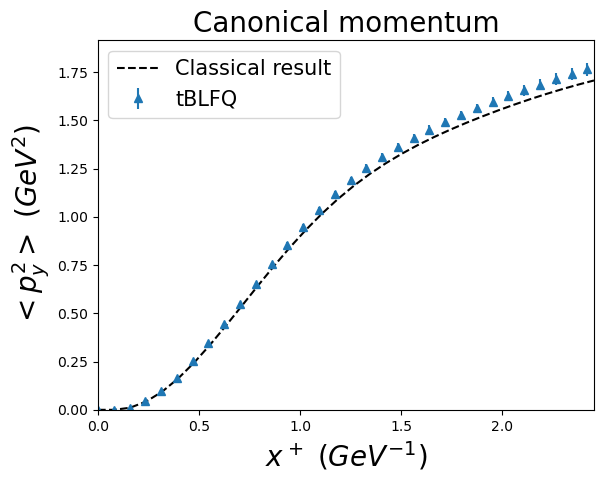

In [13]:
# We plot the results

import matplotlib.pyplot as plt

plt.errorbar(xplus, py_av, py_dev, fmt='^', label='tBLFQ')
plt.plot(xp_class, py2_class, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$<p_y^2> \ (GeV^2)$', fontsize=20)
plt.title('Canonical momentum', fontsize=20)

plt.xlim(0, max(xp_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/QM_results/Canonical_momentum.png', bbox_inches='tight')

### We compute $\hat{q}$

In [14]:
# We compute the qhat at every time step

qhat = np.diff(py_av)/np.diff(xplus)

print(qhat)

[0.         0.14388781 0.42237955 0.67655785 0.89537715 1.07179046
 1.2027328  1.28863232 1.33267814 1.33991027 1.31622131 1.26751309
 1.19935087 1.11649571 1.02423678 0.92754288 0.8314063  0.74100627
 0.6608244  0.59350269 0.53942614 0.49729822 0.46476987 0.43921083
 0.41837046 0.40084347 0.38571739 0.3721659  0.35904506 0.34509535
 0.32907718 0.31004736]


In [15]:
# We read the classical qhat
qhat_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/QM_results/classical_qy.txt')
xp_class = qhat_class[0]
qhat_class = qhat_class[1]

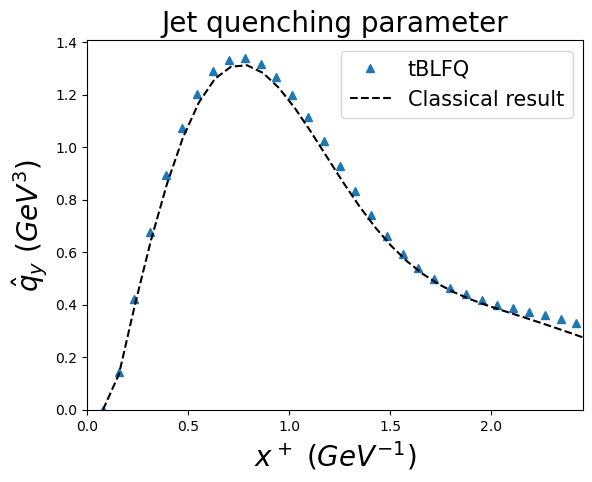

In [17]:
# We plot the results

import matplotlib.pyplot as plt

plt.plot(xplus[1:len(xplus)], qhat, '^', label='tBLFQ')
plt.plot(xp_class, qhat_class, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q}_y \ (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xp_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/QM_results/Canonical_qhat.png', bbox_inches='tight')

### Colorrected calculation

Extractthe color and event averaged $<p_y^2>$ and $<p_z^2>$ 

In [1]:
# We create a list with the files to read

Nevs = 100; Nc = 3

file_list = [['/lustre/HQCD/carlos.lamas/qJetLFH_vQM/output/corrected_calculation/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_10.000000_wy_10.000000_cQ_%i_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_sq_exp_autonomy.dat' %(nev, nc) for nev in range(Nevs)] for nc in range(1, Nc+1)]

In [2]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

df_list = []

for i in range(Nevs):
    df = [pd.read_table(file_list[c][i], header = None) for c in range(Nc)]
    df_list.append(df)

data = np.array(df_list)

In [3]:
print(np.shape(data))

(100, 3, 33, 9)


In [4]:
data_av_col = np.average(data, axis=1)
print(np.shape(data_av_col))

(100, 33, 9)


In [5]:
data_av_ev = np.average(data_av_col, axis=0)
print(np.shape(data_av_ev))

(33, 9)


In [6]:
xplus = data_av_ev[:, 0]
py2 = data_av_ev[:, 5]
pz2 = data_av_ev[:, 1]

In [7]:
# Subtract the inital value
py2 -= py2[0]
pz2 -= pz2[0]

We read the classical results

In [8]:
p_class = np.loadtxt('corrected_results/classical_pi.txt')

xplus_class = p_class[0]
py2_class = p_class[1]
pz2_class = p_class[2]

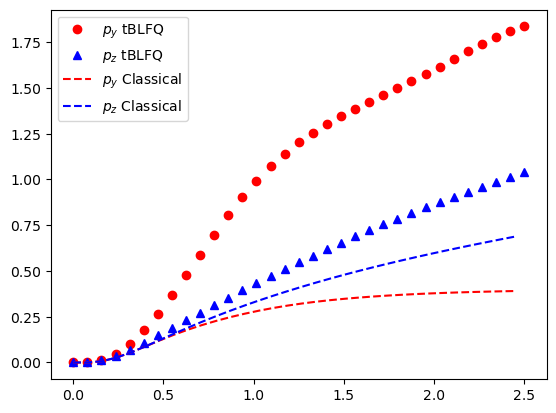

In [10]:
# We plot the results

import matplotlib.pyplot as plt

plt.plot(xplus, py2, 'ro', label=r'$p_y$ tBLFQ')
plt.plot(xplus, pz2, 'b^', label=r'$p_z$ tBLFQ')

plt.plot(xplus_class, py2_class, 'r--', label=r'$p_y$ Classical')
plt.plot(xplus_class, pz2_class, 'b--', label=r'$p_z$ Classical')

plt.legend()

plt.savefig('corrected_results/CanonicMomentum.png', bbox_inches='tight')

In [24]:
# print(pz2)
# print(pz2_class)
fact = [pz2[i]/pz2_class[i] for i in range(len(pz2_class)) if pz2_class[i] != 0]
print(fact)

[1.9112525924921862, 1.5556282302884672, 1.4164773362148355, 1.3511698448583473, 1.3205204641566537, 1.3088528360011487, 1.3085380376572182, 1.3148600605259209, 1.3246143289331955, 1.3359086095042965, 1.347998214784644, 1.3607062427164074, 1.373881631145829, 1.3871433081700455, 1.400028214088572, 1.4124556407550086, 1.4245523906299404, 1.436469319129904, 1.4482173774308913, 1.4596467415686096, 1.4704804962961473, 1.4804410242435444, 1.489405907398798, 1.4974926313376802, 1.5049105596159076, 1.5118066119581837, 1.5182232901628112, 1.5241951491215373, 1.5298203948345885, 1.5351817061710573]


In [10]:
xp = np.loadtxt('test_meeting/classical_pi.txt')[0]

piz = np.loadtxt('test_meeting/classical_pi.txt')[2]

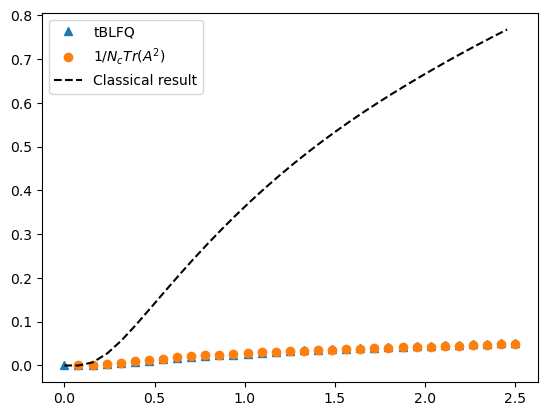

In [13]:
# We plot the results

import matplotlib.pyplot as plt

plt.plot(xplus, pz2, '^', label='tBLFQ')
plt.plot(xplus[1:len(xplus)], pz_dir, 'o', label=r'$1/N_c Tr(A^2)$')
plt.plot(xp, piz, 'k--', label='Classical result')

plt.legend()

plt.savefig('test_meeting/ClassicalDirect_comparison.png', bbox_inches='tight')

### Plot the classical canonic and kinetic momentum broadening

In [2]:
import numpy as np

xp = np.loadtxt('Jets in Glasma Results/QM_results/classical_py.txt')[0]

py = np.loadtxt('Jets in Glasma Results/QM_results/classical_py.txt')[1]
piy = np.loadtxt('Jets in Glasma Results/QM_results/classical_pi.txt')[1]
piz = np.loadtxt('Jets in Glasma Results/QM_results/classical_pi.txt')[2]

pz = np.zeros(len(xp))

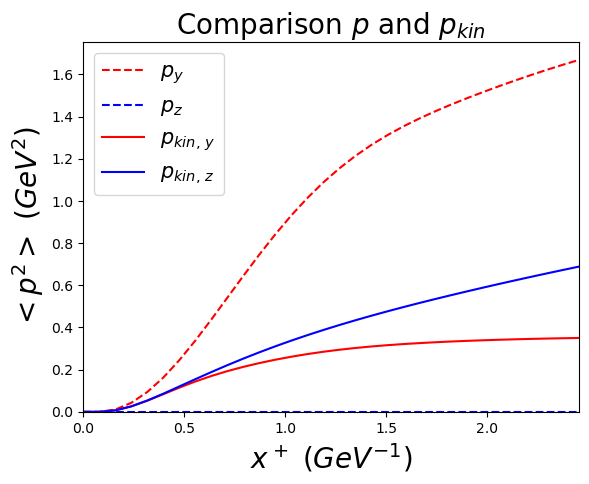

In [6]:
# We plot the results

import matplotlib.pyplot as plt

plt.plot(xp, py, 'r--', label=r'$p_y$')
plt.plot(xp, pz, 'b--', label=r'$p_z$')

plt.plot(xp, piy, 'r-', label=r'$p_{kin,\, y}$')
plt.plot(xp, piz, 'b-', label=r'$p_{kin,\, z}$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$<p^2> \ (GeV^2)$', fontsize=20)
plt.title(r'Comparison $p$ and $p_{kin}$', fontsize=20)

plt.xlim(0, max(xp)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/QM_results/Comparison_classical_momentum.png', bbox_inches='tight')